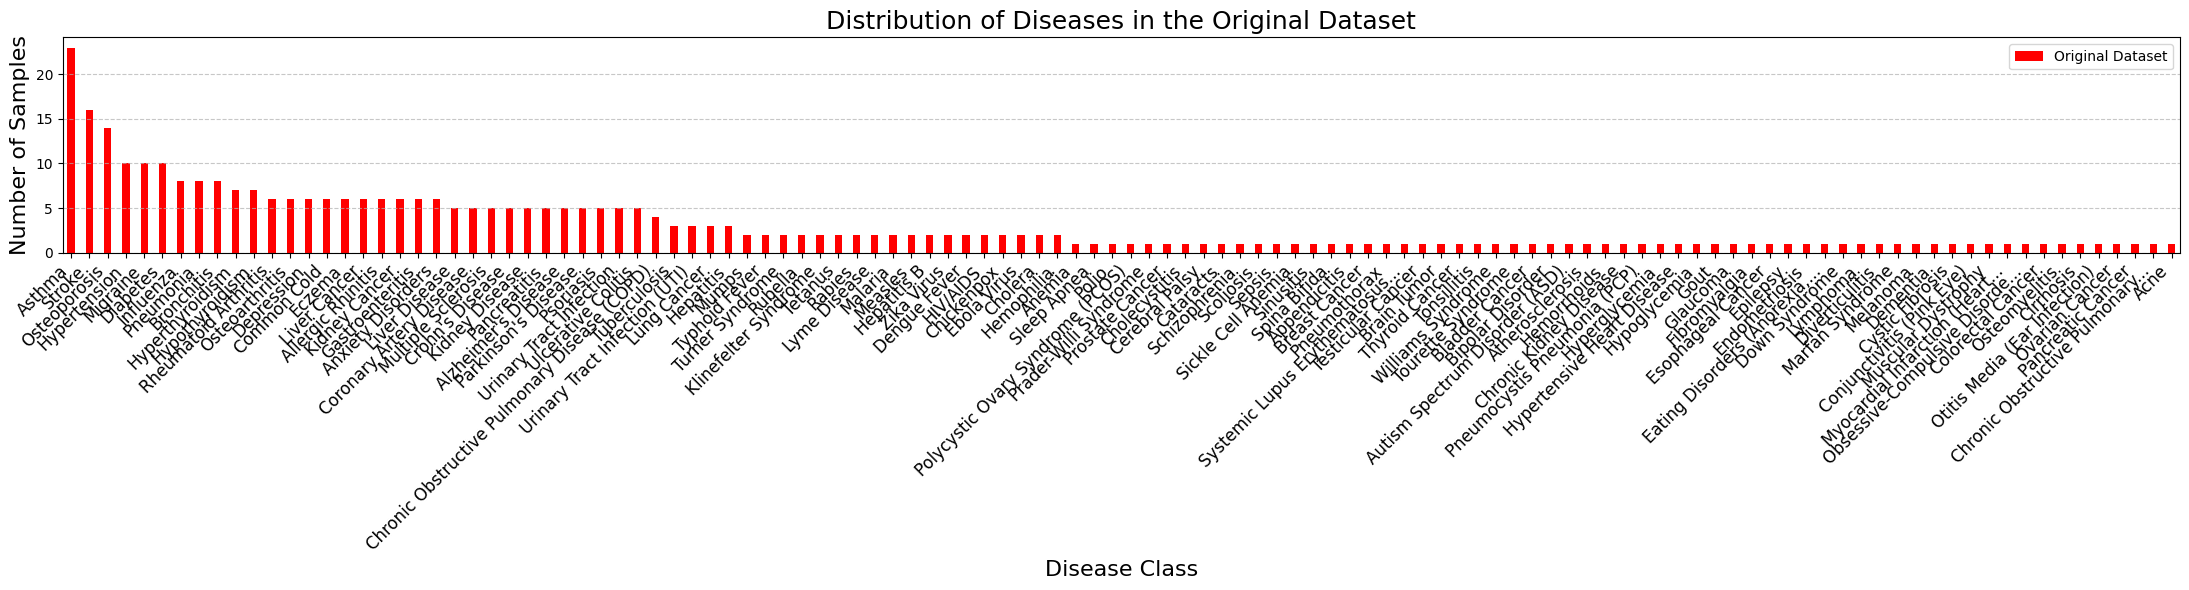

Percentage of classes with less than 2 samples in the original dataset: 0.5258620689655172


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Open locally stored datasets
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')
df_cleaned = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_balanced.csv')

# Display statistics of number of classes and number of samples for each class in graph
disease_occurrence_count = df['Disease'].value_counts()
disease_occurrence_count_cleaned = df_cleaned['Disease'].value_counts()

# Combine the two sets of classes to get all possible classes
all_disease_classes = disease_occurrence_count.index.union(disease_occurrence_count_cleaned.index)

# Reindex both datasets to ensure they include all the classes
disease_occurrence_count = disease_occurrence_count.reindex(all_disease_classes, fill_value=0).sort_values(ascending=False)
disease_occurrence_count_cleaned = disease_occurrence_count_cleaned.reindex(all_disease_classes, fill_value=0).sort_values(ascending=False)

# Plot the distribution of diseases
plt.figure(figsize=(22, 6))

# Plot dataset 1 (original dataset)
disease_occurrence_count.plot(kind='bar', color='red', width=0.4, label='Original Dataset')

# Plot dataset 2 (cleaned dataset)
# disease_occurrence_count_cleaned.plot(kind='bar', color='lightgreen', width=0.4, position=-1.5, label='Balanced Dataset')

# Add labels and title with adjusted font sizes
plt.title('Distribution of Diseases in the Original Dataset', fontsize=18)
plt.xlabel('Disease Class', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)
#plt.xticks(ticks=range(len(disease_occurrence_count.index)), labels=disease_occurrence_count.index, rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to make sure everything fits (important for long labels)
plt.tight_layout()

# Display the plot
plt.show()

# Show how many classes have number of smaples below 2 (in percentage)
print("Percentage of classes with less than 2 samples in the original dataset:", (disease_occurrence_count < 2).mean())

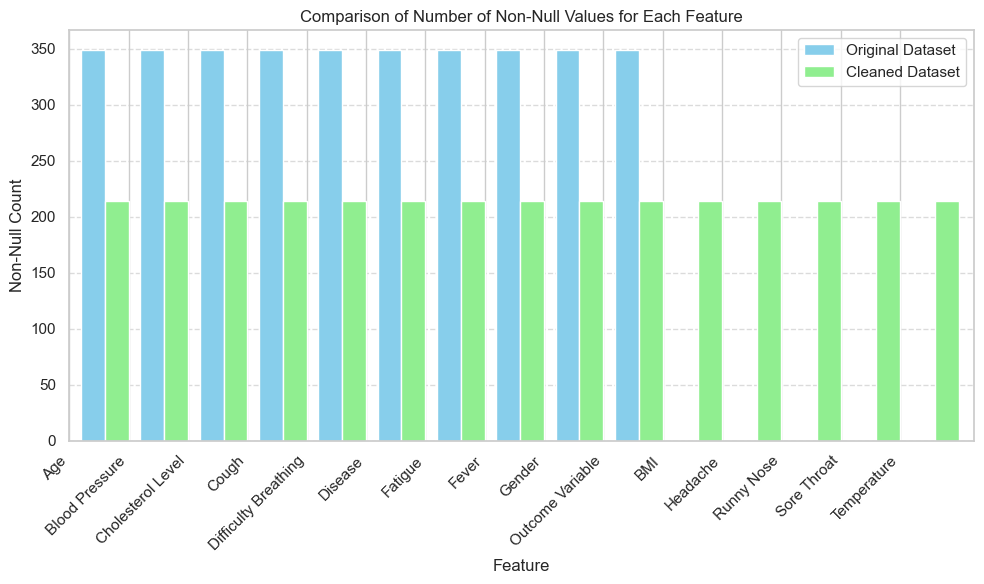

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Count non-null values for each feature in the original and cleaned datasets
df_non_null_count = df.notnull().sum()
df_cleaned_non_null_count = df_cleaned.notnull().sum()

# Create a DataFrame for plotting
feature_comparison = pd.DataFrame({
    'Original Dataset': df_non_null_count,
    'Cleaned Dataset': df_cleaned_non_null_count
})

# Sort by 'Original Dataset' values for better visualization
feature_comparison = feature_comparison.sort_values(by='Original Dataset', ascending=False)

# Plot feature comparison
plt.figure(figsize=(10, 6))

# Plot the original dataset
feature_comparison['Original Dataset'].plot(kind='bar', color='skyblue', width=0.4, position=-0.5, label='Original Dataset')

# Plot the cleaned dataset
feature_comparison['Cleaned Dataset'].plot(kind='bar', color='lightgreen', width=0.4, position=-1.5, label='Extended Dataset')

# Add labels and title
plt.title('Comparison of Number of Non-Null Values for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Non-Null Count')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to make sure everything fits (important for long labels)
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
"""
@author: 
    Patrik Holler
Data Cleaning:
- Filter the dataset to only include the first n diseases
- Add new Features and to the dataset with basic rules to set their values

"""

import pandas as pd

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')

# Display statistics of number of classes and number of samples for each class
disease_occurrence_count = df['Disease'].value_counts()
print("Dataset contains", len(df), "samples with", len(disease_occurrence_count), "unique classes and number of features, ", len(df.columns))

# return first n names of diseases
n = 10
disease_names = disease_occurrence_count.index[:n].tolist()
print(disease_names)

# Filter the dataset to only include the first n diseases
df_filtered = df[df['Disease'].isin(disease_names)].copy()

# New symptoms
new_symptoms = ['Headache', 'Sore Throat','Runny Nose']
new_vital_signs = ['Temperature', 'BMI'] 

# Add new symptoms to the dataset using .loc
for symptom in new_symptoms:
    df_filtered.loc[:, symptom] = 'No'

# Add new vital signs with default values
df_filtered.loc[:, 'Temperature'] = 36.5  # Normal temperature
df_filtered.loc[:, 'BMI'] = 22.5  # Normal BMI

# Update existing records with 'Yes' where applicable for positive cases
# Influenza
df_filtered.loc[
    (df_filtered['Disease'] == 'Influenza') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Headache', 'Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 'Yes', 38.0]  # Higher temperature for fever

# Migraine
df_filtered.loc[
    (df_filtered['Disease'] == 'Migraine') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Stroke
df_filtered.loc[
    (df_filtered['Disease'] == 'Stroke') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Hypertension
df_filtered.loc[
    (df_filtered['Disease'] == 'Hypertension') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Pneumonia
df_filtered.loc[
    (df_filtered['Disease'] == 'Pneumonia') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Temperature']
] = ['Yes', 39.0]  # Fever for Pneumonia

# Bronchitis
df_filtered.loc[
    (df_filtered['Disease'] == 'Bronchitis') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 37.8]  # Elevated temperature

# Add new records (example)
new_records = pd.DataFrame([
    {'Disease': 'Asthma', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 24.0},
    {'Disease': 'Diabetes', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 28.0},
    {'Disease': 'Hypertension', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 30.0},
    {'Disease': 'Pneumonia', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'No', 'Temperature': 39.0, 'BMI': 25.0},
    {'Disease': 'Bronchitis', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 37.8, 'BMI': 26.0},
    {'Disease': 'Influenza', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 38.0, 'BMI': 27.0},
    {'Disease': 'Migraine', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 22.5},
    {'Disease': 'Stroke', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 22.5},
    {'Disease': 'Hypertension', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 22.5},
    {'Disease': 'Pneumonia', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'No', 'Temperature': 39.0, 'BMI': 22.5},
    {'Disease': 'Bronchitis', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 37.8, 'BMI': 22.5},
    
])

# Append new records to the DataFrame
df_updated = pd.concat([df_filtered, new_records], ignore_index=True)

# Store in new CSV file
df_filtered.to_csv('kaggle/Disease Symptoms and Patient Profile Dataset_filtered.csv', index=False)


Dataset contains 349 samples with 116 unique classes and number of features,  10
['Asthma', 'Stroke', 'Osteoporosis', 'Hypertension', 'Diabetes', 'Migraine', 'Influenza', 'Pneumonia', 'Bronchitis', 'Hyperthyroidism']


Feature names:  ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


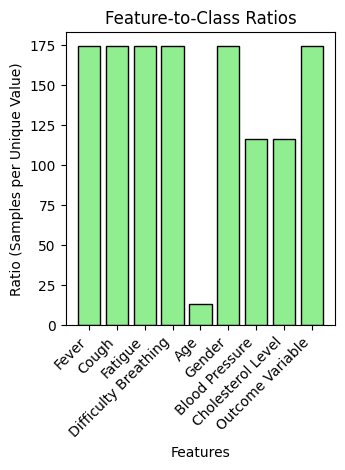

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')

# Calculate the distribution of diseases
disease_occurrence_count = df['Disease'].value_counts()

# Calculate the number of unique values for each feature
feature_distribution = df.nunique()

# Create a ratio of disease occurrence to feature distribution
feature_names = df.columns.tolist()
feature_names.remove('Disease')
print("Feature names: ", feature_names)
ratios = [
    disease_occurrence_count.sum() / feature_distribution[feature]
    for feature in feature_names
]

# # Plot the disease distribution
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# disease_occurrence_count.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Distribution of Diseases')
# plt.xlabel('Disease')
# plt.ylabel('Number of Samples')
# plt.xticks(rotation=45, ha='right')

# Plot the feature-to-class ratios
plt.subplot(1, 2, 2)
plt.bar(feature_names, ratios, color='lightgreen', edgecolor='black')
plt.title('Feature-to-Class Ratios')
plt.xlabel('Features')
plt.ylabel('Ratio (Samples per Unique Value)')
# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.utils import resample

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_filtered.csv')

# balance samples to class ration in the dataset each class should have the same number of samples by removing samples from classes with more samples than average and adding samples to classes with less samples than average

# Calculate the number of samples per class
class_counts = df['Disease'].value_counts()
average_samples = class_counts.mean()

# Separate the dataset into over-represented and under-represented classes
over_represented = class_counts[class_counts > average_samples].index
under_represented = class_counts[class_counts < average_samples].index

print("Average number of samples per class:", average_samples)
print("Over-represented classes:", over_represented)
print("Under-represented classes:", under_represented)

# Handle over-represented classes: Down-sample to the average number of samples
balanced_df = pd.DataFrame()  # Placeholder for balanced data
for disease in over_represented:
    disease_samples = df[df['Disease'] == disease]
    downsampled = resample(disease_samples, replace=False, n_samples=int(average_samples), random_state=42)
    balanced_df = pd.concat([balanced_df, downsampled])

# Handle under-represented classes: Up-sample to the average number of samples
for disease in under_represented:
    disease_samples = df[df['Disease'] == disease]
    upsampled = resample(disease_samples, replace=True, n_samples=int(average_samples), random_state=42)
    balanced_df = pd.concat([balanced_df, upsampled])
    
# Add classes that are already balanced
balanced_classes = class_counts[class_counts == average_samples].index
for disease in balanced_classes:
    balanced_df = pd.concat([balanced_df, df[df['Disease'] == disease]])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
balanced_df.to_csv('kaggle/Disease Symptoms and Patient Profile Dataset_balanced.csv', index=False)

# Display the distribution of the balanced dataset
print("Balanced dataset class distribution:")
print(balanced_df['Disease'].value_counts())



Average number of samples per class: 11.4
Over-represented classes: Index(['Asthma', 'Stroke', 'Osteoporosis'], dtype='object', name='Disease')
Under-represented classes: Index(['Diabetes', 'Migraine', 'Hypertension', 'Influenza', 'Bronchitis',
       'Pneumonia', 'Hyperthyroidism'],
      dtype='object', name='Disease')
Balanced dataset class distribution:
Disease
Bronchitis         11
Asthma             11
Hypertension       11
Influenza          11
Osteoporosis       11
Migraine           11
Pneumonia          11
Stroke             11
Hyperthyroidism    11
Diabetes           11
Name: count, dtype: int64


In [2]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from pathlib import Path

# Import functions from the analysis package
file_name = "Disease Symptoms and Patient Profile Dataset_exported"
dataset_path = Path(f"./kaggle/{file_name}.csv")
dataset = pd.read_csv(dataset_path)

x_train,x_test,y_train,y_test = train_test_split(dataset.iloc[:,1:], dataset.iloc[:,0],
                                                test_size=0.2)

print(f"Features to be use for prediction:\n{dataset.iloc[:, 1:].head()}")
print(f"Target variable:\n{dataset.iloc[:, 0].head()}")

oe = OrdinalEncoder(categories=[['No','Yes']])
x_train_fever = oe.fit_transform(x_train["Fever"].array.reshape(-1, 1))
x_test_fever = oe.transform(x_test["Fever"].array.reshape(-1, 1))

be = OrdinalEncoder(categories=[['No','Yes']])
x_train_cough = be.fit_transform(x_train["Cough"].array.reshape(-1, 1))
x_test_cough = be.transform(x_test["Cough"].array.reshape(-1, 1))

ce = OrdinalEncoder(categories=[['No','Yes']])
x_train_fat = ce.fit_transform(x_train["Fatigue"].array.reshape(-1, 1))
x_test_fat = ce.transform(x_test["Fatigue"].array.reshape(-1, 1))

de = OrdinalEncoder(categories=[['No','Yes']])
x_train_breath = de.fit_transform(x_train["Difficulty Breathing"].array.reshape(-1, 1))
x_test_breath = de.transform(x_test["Difficulty Breathing"].array.reshape(-1, 1))

fe = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_blood = fe.fit_transform(x_train["Blood Pressure"].array.reshape(-1, 1))
x_test_blood = fe.transform(x_test["Blood Pressure"].array.reshape(-1, 1))

ge = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_chol = ge.fit_transform(x_train["Cholesterol Level"].array.reshape(-1, 1))
x_test_chol = ge.transform(x_test["Cholesterol Level"].array.reshape(-1, 1))

ohe = OneHotEncoder(drop='first')
x_train_gender = ohe.fit_transform(x_train['Gender'].array.reshape(-1, 1))
x_test_gender = ohe.transform(x_test['Gender'].array.reshape(-1, 1))

x_train_transformed = np.concatenate((x_train_fever,x_train_cough,x_train_fat,x_train_breath,x_train_blood,x_train_chol,x_train_gender),axis=1)

x_test_transformed = np.concatenate((x_test_fever,x_test_cough,x_test_fat,x_test_breath,x_test_blood,x_test_chol,x_test_gender),axis=1)

le = LabelEncoder()
le.fit(y_train)


Features to be use for prediction:
  Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
0   Yes    No     Yes                  Yes   19  Female            Low   
1    No   Yes     Yes                   No   25  Female         Normal   
2    No   Yes     Yes                   No   25  Female         Normal   
3   Yes   Yes      No                  Yes   25    Male         Normal   
4   Yes   Yes      No                  Yes   25    Male         Normal   

  Cholesterol Level Outcome Variable  
0            Normal         Positive  
1            Normal         Negative  
2            Normal         Negative  
3            Normal         Positive  
4            Normal         Positive  
Target variable:
0      Influenza
1    Common Cold
2         Eczema
3         Asthma
4         Asthma
Name: Disease, dtype: object


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 6 has 0 dimension(s)